In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_csv('avocado.csv')
display(df.head())
display(df.describe())
df.info()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Data Cleaning

In [3]:
# Identify missing values
missing_values = df.isnull().sum()
print(missing_values)
# Remove duplicate rows
df = df.drop_duplicates()


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [4]:
# Check data types
print(df.dtypes)

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


# Data Manipulation

In [8]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Convert object columns to string
df['type'] = df['type'].astype('string')
# Set date as index
df.set_index('Date', inplace=True)

In [9]:
# Calculate average price per region over time
avg_price_by_region = df.groupby('region', as_index=False)['AveragePrice'].mean().sort_values(by='AveragePrice')


In [10]:
# Average price comparison between conventional and organic avocados
price_comparison = df.groupby(['type', 'region'])['AveragePrice'].mean().unstack()


In [11]:
# Total volume sold per region per year
df['year'] = df.index.year
total_volume = df.groupby(['region', 'year'])['Total Volume'].sum().unstack()


# Data Visualization

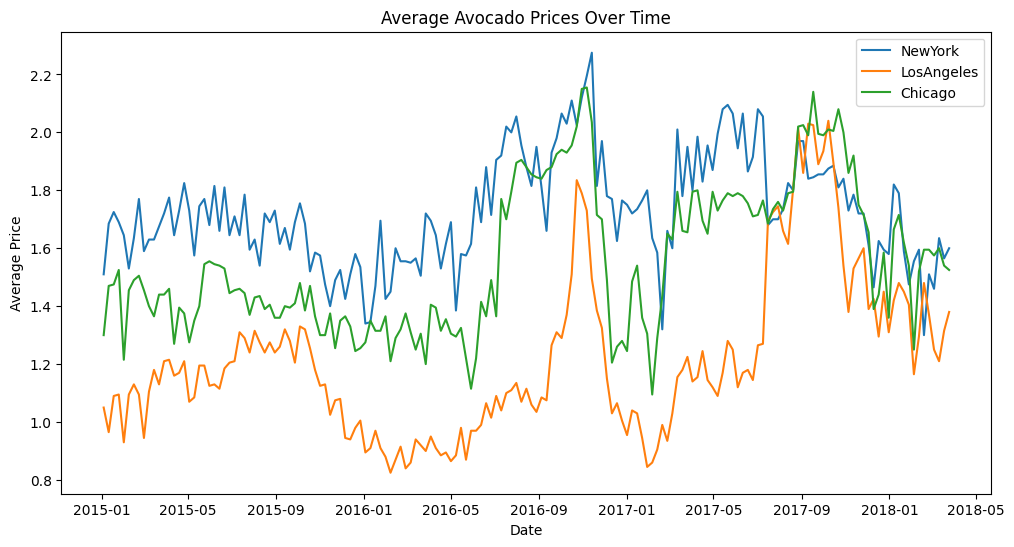

In [16]:
plt.figure(figsize=(12, 6))
for region in ['NewYork', 'LosAngeles', 'Chicago']:
    subset = df[df['region'] == region].groupby('Date')['AveragePrice'].mean()
    plt.plot(subset.index, subset.values, label=region)

plt.title('Average Avocado Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()


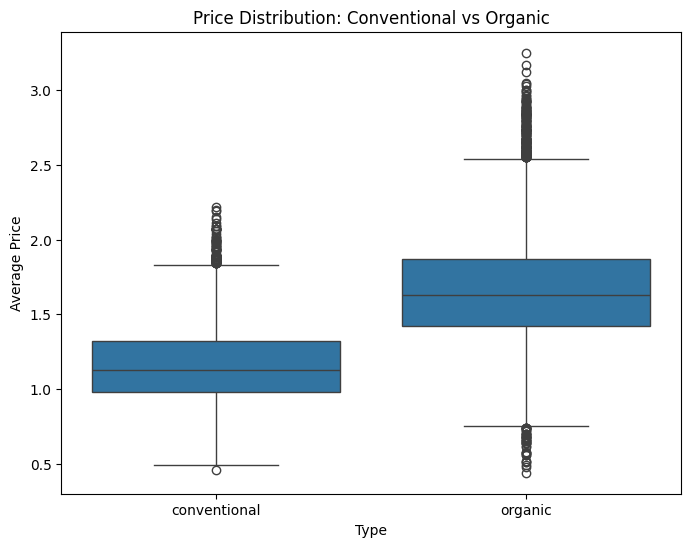

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('Price Distribution: Conventional vs Organic')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()


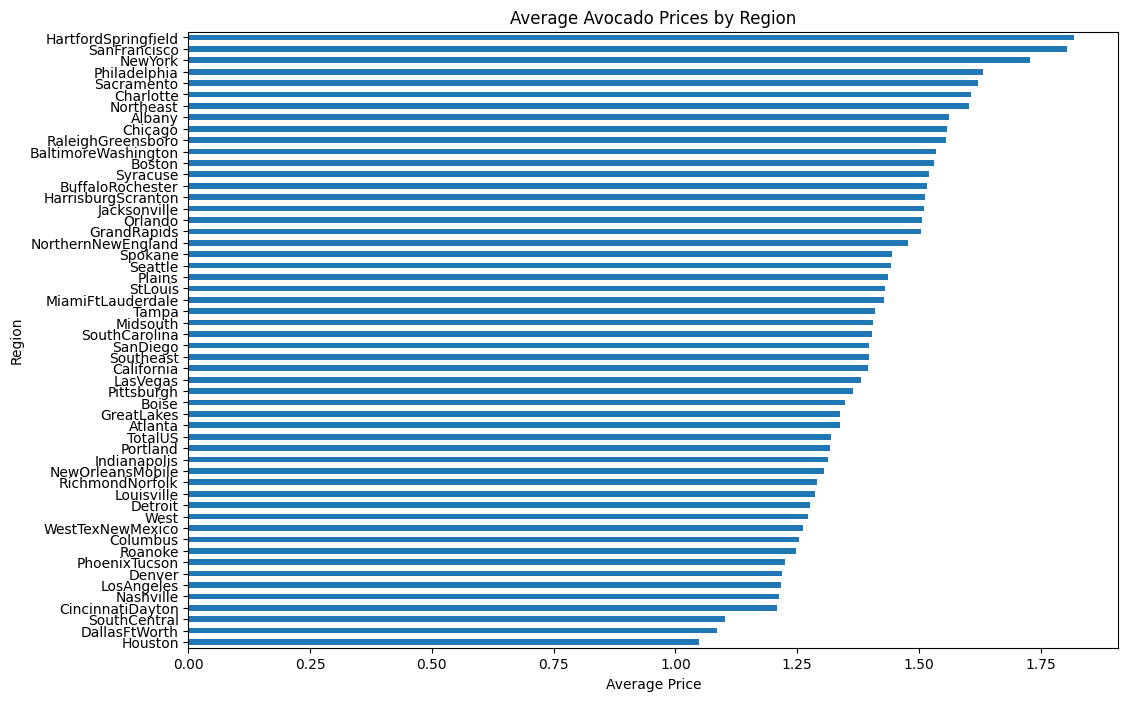

In [18]:
avg_price_by_region = df.groupby('region')['AveragePrice'].mean().sort_values()
plt.figure(figsize=(12, 8))
avg_price_by_region.plot(kind='barh')
plt.title('Average Avocado Prices by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()


In [ ]:
# Create report summarizing the analysis
report = "Avocado Prices Report\n" + "="*30 + "\n\n"
report += "Average Price by Region:\n"
report += avg_price_by_region.to_string(index=False) + "\n\n"

report += "Average Price Trend Over Time:\n"
report += price_trend.head(10).to_string(index=False) + "\n\n"  # Showing first 10 entries

# Save to a text file
with open("avocado_report.txt", "w") as file:
    file.write(report)

print("Report generated: avocado_report.txt")

NameError: name 'total_volume_by_region' is not defined